In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, random as rn
import seaborn as sns, math

## Tosses of a Biased Coin
#### Problem 1
Consider $10$ independent tosses of a biased coin with the probability of Heads at each toss equal to $p$, where $0<p<1$.

1. Let $A$ be the event that there are $6$ Heads in the first $8$ tosses. Let $B$ be the event that the $9$th toss results in Heads. Find $P(B\,|\,A)$.

Since each toss is independent, results from event $A$ don't effect event $B$. We have 
$$P(B\,|\,A)=\frac{P(B\cap A)}{P(A)}=\frac{P(B)P(A)}{P(A)}=P(B)=p$$

2. Find the probability that there are $3$ Heads in the first $4$ tosses and $2$ Heads in the last $3$ tosses.

Set $A$ be the first case and $B$ be the second case, then 
$$P(A\cap B)=P(A)P(B)={4\choose 3}\left(1-p\right)p^3\times{3\choose 2}\left(1-p\right)p^2=12\left(1-p\right)^2p^5$$

3. Given that there were $4$ Heads in the first $7$ tosses, find the probability that the $2^{nd}$ Heads occurred at the $4^{th}$ toss.

Let $A$ be the event $4$ Heads in the first $7$ tosses, and $B$ be the event $4^{th}$ toss is the second Head.

$$P(B\cap A)=\frac{P(A\cap B)}{P(A)}=\frac{{3\choose 1}\left(1-p\right)^2\times p\times p\times{3\choose 2}\left(1-p\right)^1\times p}{{7\choose 4}\left(1-p\right)^3\times p^4}=\frac{{3\choose 1}\times{3\choose 2}}{{7\choose 4}}=\frac{9}{35}$$

4. We are interested in calculating the probability that there are $5$ Heads in the first $6$ tosses and $3$ Heads in the last $5$ tosses.

Set $A$ be the first event and $B$ be the second event. These two events are not independent as the sixth toss is in both events and it either a Head or a Tail.

$$\begin{aligned}
P(A\cap B)&=P(A\cap B\,|\,\text{the sixth toss is a Head}) + P(A\cap B\,|\,\text{the sixth toss is a Tail})\\
&={5\choose 4}\times(1-p)p^4\times p\times{4\choose 2}\times(1-p)^2p^2+{5\choose 5}\times p^5\times (1-p)\times{4\choose 3}\times(1-p)p^3\\
&=30p^7(1-p)^3+4p^8(1-p)^2
\end{aligned}$$

## Three-sided Dice
#### Problem 2
We have two fair three-sided dice, indexed by  $i=1,2$ . Each die has sides labelled  $1$ ,  $2$ , and  $3$ . We roll the two dice independently, one roll for each die. For  $i=1,2$ , let the random variable  $X_i$  represent the result of the  $i$th die, so that  $X_i$  is uniformly distributed over the set  $\{1,2,3\}$ . Define  $X=X_2−X_1$ .

In [2]:
faces = ["1", "2", "3"]
Omega = [""]
for _ in range(2):
    Omega = [o+f for o in Omega for f in faces]
    
pd.DataFrame(np.array(Omega).reshape(3, 3))

,0,1,2
0,11,12,13
1,21,22,23
2,31,32,33


In [3]:
Omega2 = []
for i in range(1, 4):
    for j in range(1, 4):
        Omega2.append(j-i)
        
pd.DataFrame(np.array(Omega2).reshape(3, 3))

,0,1,2
0,0,1,2
1,-1,0,1
2,-2,-1,0


1. Calculate the numerical values of following probabilities, as well as the expected value and variance of  $X$:
    1. $P(X=0)=\frac{1}{3}$
    2. $P(X=1)=P(X=-1)=\frac{2}{9}$
    3. $P(X=-2)=P(X=2)=\frac{1}{9}$
    4. $P(X=3)=0$
    5. $E[X]=\sum_{x=-2}^{2}xp_X(x)=(-2)\cdot \left(\frac{1}{9}\right)+(-1)\cdot\left(\frac{2}{9}\right)+(0)\cdot\left(\frac{1}{3}\right)+(1)\cdot\left(\frac{1}{9}\right)+(2)\cdot\left(\frac{1}{9}\right)=0$
    6. $Var(X)=E[(X-E[X])^2]=E[X^2]=(0)\cdot\left(\frac{1}{3}\right)+2((1)\cdot\left(\frac{1}{9}\right)+(4)\cdot\left(\frac{1}{9}\right))=\frac{4}{3}$
    
    
|   |   |   |
|---|---|---|
| 0 | 1 | 4 |
| 1 | 0 | 1 |
| 4 | 1 | 0 |
2. Let  $Y=X^2$ . Calculate the following probabilities
    1. $P(Y=0)=\frac{1}{3}$
    2. $P(Y=1)=\frac{4}{9}$
    3. $P(Y=2)=0$

## PMF, Expectation, and Variance
#### Problem 3
The random variables $X$ and $Y$ have joint PMF
$$p_{x, y}(x, y)=
\begin{cases}
c\cdot(x+y)^2,&\,\,\text{if $x\in\{1,2,4\}$ and $y\in\{1,3\}$},\\ 
0,&\,\,\text{otherwise.}
\end{cases}$$



1. Find the value of the constant  $c$ .

In [4]:
total = 0
for x in [1, 2, 4]:
    for y in [1, 3]:
        total += (x + y)**2
        
print("c = 1/"+str(total))

c = 1/128


2. Find $P(Y<X)$

Set $A$ be the event $Y<X$, we have $(2,1), (4,1), (4,3)$. So
$$P(A)=\frac{3^2+5^2+7^2}{128}=\frac{83}{128}$$

3. Find $P(Y=X)$

There is only one case that $y=x$, 
$$P(Y=X)=\frac{1}{128}$$

4. Find the following probabilities.
    1. $P(X=1)=\sum_{y\in\{1,3\}}p_{x=1, y}(1, y)=\frac{20}{128}$
    2. $P(X=2)=\sum_{y\in\{1,3\}}p_{x=2, y}(2, y)=\frac{34}{128}$
    3. $P(X=3)=\sum_{y\in\{1,3\}}p_{x=3, y}(3, y)=\frac{0}{128}$
    4. $P(X=4)=\sum_{y\in\{1,3\}}p_{x=4, y}(4, y)=\frac{74}{128}$
    
5. Find the expectations $E[X]$ and $E[XY]$
$$E[X]=\sum_{x\in\{1,2,4\}}\sum_{y\in\{1,2\}}xp_{x,y}(x, y)=\sum_{x\in\{1,2,4\}}xp_X(x)=3$$
$$E[XY]=\sum_{x\in\{1,2,4\}}\sum_{y\in\{1,2\}}xyp_{x,y}(x, y)=\frac{227}{32}$$

6. Find the variance of $X$

$$Var(X)=E[(X-E[X])^2]=\left(1-3\right)^2\left(\frac{20}{128}\right)+\left(2-3\right)^2\left(\frac{34}{128}\right)+\left(4-3\right)^2\left(\frac{74}{128}\right)=\frac{47}{32}$$

## Joint PMF
#### Problem 4
The joint PMF,  $p_{X,Y}(x,y)$ , of the random variables  $X$  and  $Y$  is given by the following table:

|      |    |   |    |    |
|------|----|---|---|-----|
| y=1  | 4c | 0 | 2c | 8c |
| y=0  | 3c | 2c| 0  | 2c |
| y=-1 | 2c | 0 | c  | 4c |
|      | x=-2| x = -1| x = 0 | x =1|
|      |     |       |       |     | |

1. Find the value of the constant $c$.

$$\begin{aligned}
1&=\sum_{x=-2}^{1}\sum_{y=-1}^{1}p_{X, Y}(x,y)\\
&=2c+3c+4c+2c+c+2c+4c+2c+8c\\
&=28c
\end{aligned}$$
Thus, $c=1/28$.

2. Find $p_X(1)$.

$$p_X(1)=\sum_{y=-1}^{1}p_{X, Y}(1, y)=\frac{1}{2}$$

3. Consider the random variable $Z=X^2Y^3$, Find $E[Z\,|\,Y=-1]$

$$\begin{aligned}
E[Z\,|\,Y=-1]&=E[X^2Y^3\,|\,Y=-1]\\
&=E[X^2(-1)^3\,|\,Y=-1]\\
&=-E[X^2\,|\,Y=-1]\\
&=-\left(\sum_{x=-2}^{1}x^2p_{X\,|\,Y}(x\,|\,-1)\right)
\end{aligned}$$

In order to calculate the conditional expectation, we need to conditional PMF of $X$ given $Y=-1$:
$$p_{X\,|\,Y}(x, -1)=\frac{p_{X, Y}(x, -1)}{p_Y(-1)}
=\begin{cases}
\frac{2c}{7c},&\text{if $x=-2$,}\\
\frac{c}{7c},&\text{if $x=0$,}\\
\frac{4c}{7c},&\text{if $x=1$,}\\
0,&\text{otherwise}\\
\end{cases}$$

Therefore,
$$\begin{aligned}
E[Z\,|\,Y=-1]&=-\left(\sum_{x=-2}^{1}x^2p_{X\,|\,Y}(x\,|\,-1)\right)\\
&=-\frac{12}{7}
\end{aligned}$$

4. Conditioned on the event that $Y\neq 0$, are $X$ and $Y$ independent?

Yes. Given $Y\neq 0$, the conditional distribution of $Y$ given $X=x$ is the same for all $x\in\{-2,-1,0,1\}$, $P(Y=y\,|\,X=x, Y\neq 0)=P(Y=y\,|\,Y\neq 0)$, for all $x\in\{-2,-1,0,1\}$.

For example,
$$\begin{aligned}
P(Y=1\,|\,X=−2,Y\neq 0)& = P(Y=1\,∣\,X=0,Y\neq 0)\\ 	 	 
&=P(Y=1∣X=1,Y\neq 0)\\	 	 
&=P(Y=1∣Y\neq 0)=2/3
\end{aligned}$$

5. Find the conditional variance of $Y$ given that  $X=0$.

The PMF of $Y$ given $X=0$ is
$$p_{Y\,|\,X}(y\,|\,0)=\frac{p_{X,Y}(0,y)}{p_X(0)}=
\begin{cases}
\frac{c}{3c},&\,\text{if $y=-1$,}\\
\frac{2c}{3c},&\,\text{if $y=1$,}\\
0,&\text{otherwise}
\end{cases}$$

The expectation of $E[Y\,|\,X=0]$ is 
$$E[Y\,|\,X=0]=\sum_{y=-1}^{1}yp_{Y\,|\,X}p(y\,|\,0)=\frac{1}{3}$$

The conditional variance is 
$$\begin{aligned}
Var(Y\,|\,X=0)&=E[(Y-E[Y\,|\,X=0])^2\,|\,X=0]\\
&=\sum_{y=-1}^{1}\left(y-\frac{1}{3}\right)^2p_{Y\,|\,X}(y\,|\,0)\\
&=\frac{8}{9}
\end{aligned}$$

## Indicator Variables
#### Problem 5
Consider a sequence of  $n+1$  independent tosses of a biased coin, at times  $k=0,1,2,\dots,n$ . On each toss, the probability of Heads is  $p$ , and the probability of Tails is  $1−p$ .

A reward of one unit is given at time  $k$ , for  $k\in\{1,2,\dots,n\}$ , if the toss at time  $k$  resulted in Tails and the toss at time  $k−1$  resulted in Heads. Otherwise, no reward is given at time  $k$ .

Let  $R$  be the sum of the rewards collected at times  $1,2,\dots,n$ . Find $E[R]$ and $Var(R)$


In [5]:
def n_tosses(n, p):
    outcomes = []
    for t in range(n):
        toss = rn.uniform(0, 1)
        if toss > p:
            outcomes.append("H")
        else:
            outcomes.append("T")
            
    rewards = 0
    for i in range(1, n):
        if outcomes[i] == "T" and outcomes[i-1] == "H":
            rewards += 1
            
    return rewards

In [6]:
n = 100 # 100 tosses
p = rn.uniform(0, 1) # get probability p between 0, 1
rewards = pd.DataFrame([n_tosses(n, p) for _ in range(1000)]) # simulate the experience 1000 times

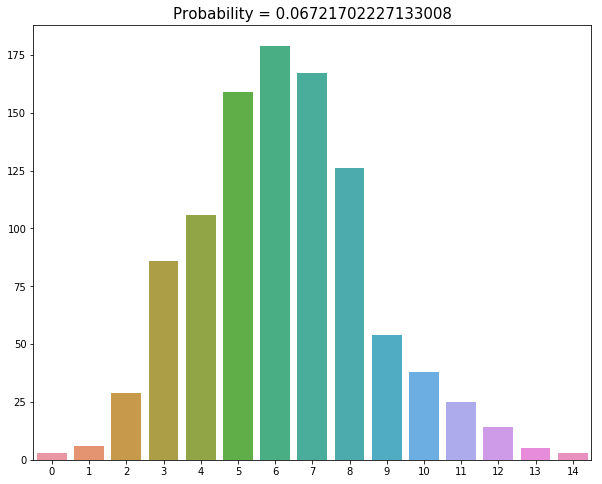

In [7]:
rewards_counts = rewards[0].value_counts()
fig = plt.figure(figsize = (10, 8))
sns.barplot(rewards_counts.index, rewards_counts.values)
plt.title("Probability = "+str(p), fontsize = 15)
plt.show()

Set $I_k$ be the reward given at time $k$, for $k\in\{1,2,3,\dots,n\}$. We have 
$$I_k=
\begin{cases}
1, &\,\,\text{if $k$ resulted a Tail and $k-1$ resulted a Head}\\
0, &\,\,\text{otherwise}
\end{cases}$$
We can rewrite $R$ as $R=I_1+I_2+\dots+I_n$

Since $I_k$ is a Bernoulli indicator variable and each toss is idependent, we have
$$E[I_k]=E[I_1]=P(I_1=1)=P(\text{a Tail at time $1$ and a Head at time $0$})=p(1-p)$$

This gives us
$$E[R]=E\left[\sum_{k=1}^{n}I_k\right]=\sum_{k=1}^{n}E[I_1]=nE[I_1]=np(1-p)$$

To calculate $Var(R)$, we apply this formula $Var(R)=E[R^2]-(E[R])^2$.

$$E[R^2]=E\left[\left(\sum_{m=1}^{n}I_m\right)\left(\sum_{l=1}^{n}I_m\right)\right]=\sum_{m=1}^{n}\sum_{l=1}^{n}E[I_mI_l]=\sum_{m=1}^{n}E[I_m]+\sum_{m,\,l\,:\,m\neq l}^{n}E[I_mI_l]$$

There are total $n^2$ terms:

1. when $m=l$, there are $n$ terms and $E[I_mI_l]=E[I^2_m]=E[I_m]=p(1-p)$
2. when $m=k+1$ or $l=k+1$, we have $I_kI_{k+1}$ and this implies time $k$ results a Tail and time $k+1$ results a Tail as well which is impossible. So $E(I_kI_{k+1})=0$ and there are $2(n-1)$ terms.
3. when $m=k+i$ or $l=k+i$ where $i\geq 2$ and $k+i\leq n$, this tells us time $k+i$ results a Tail and time $k+i-1$ results a Head. For example, time $k+2$ is a Tail while time $k+1$ is a Head. So
$$E[I_kI_{k+i}]=P(I_k=1, I_{k+i}=1)=P(I_k=1)P(I_{k+i}=1\,|\,I_k=1)=p^2(1-p)^2$$ there are $n^2-n-2(n-1)$ terms if we combine case one and case two.

Therefore,
$$\begin{aligned}
Var(R)&=E[R^2]-(E[R])^2\\
&=\sum_{m=1}^{n}E[I_m]+\sum_{m,\,l\,:\,m\neq l}^{n}E[I_mI_l] - (E[R])^2\\
&=np(1-p) + 2(n-1)\times0 + (n^2-n-2(n-1))p^2(1-p)^2-n^2p^2(1-p)^2\\
&=np(1-p)-(3n-2)p^2(1-p)^2
\end{aligned}$$